In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Data Wragling**

**Gathering Data**

In [100]:
dlh_df = pd.read_csv("/content/DLH.csv")
print(dlh_df.shape)
print(dlh_df)

(31, 4)
                                                 NAMA  SATUAN  \
0    Volume Air Limbah Kecamatan Lubuklinggau Timur I   Liter   
1   Volume Air Limbah Kecamatan Lubuklinggau Timur II   Liter   
2    Volume Air Limbah Kecamatan Lubuklinggau Barat I   Liter   
3   Volume Air Limbah Kecamatan Lubuklinggau Barat II   Liter   
4   Volume Air Limbah Kecamatan Lubuklinggau Selat...   Liter   
5   Volume Air Limbah Kecamatan Lubuklinggau Selat...   Liter   
6    Volume Air Limbah Kecamatan Lubuklinggau Utara I   Liter   
7   Volume Air Limbah Kecamatan Lubuklinggau Utara II   Liter   
8                       Komposisi Sampah Sisa Makanan  Persen   
9                      Komposisi Sampah Kertas Karton  Persen   
10               Komposisi Sampah Nappies ( Pampers )  Persen   
11                             Komposisi Sampah Taman  Persen   
12                              Komposisi Sampah Kayu  Persen   
13                           Komposisi Sampah Tekstil  Persen   
14               

**Assessing Data**

In [101]:
# Menampilkan informasi pada dataset
dlh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   NAMA                   31 non-null     object 
 1   SATUAN                 31 non-null     object 
 2   NILAI 2024 SEMESTER I  31 non-null     float64
 3   BIDANG                 31 non-null     object 
dtypes: float64(1), object(3)
memory usage: 1.1+ KB


In [102]:
# Memeriksa missing value
dlh_df.isna().sum()

,0
NAMA,0
SATUAN,0
NILAI 2024 SEMESTER I,0
BIDANG,0


In [103]:
# Memeriksa duplikasi data
print("Jumlah duplikasi: ", dlh_df.duplicated().sum())

Jumlah duplikasi:  0


**Cleaning Data**

In [104]:
# Menghapus kolom yang tidak diperlukan
dlh_df = dlh_df.drop(columns=["BIDANG"])
print(dlh_df)

                                                 NAMA  SATUAN  \
0    Volume Air Limbah Kecamatan Lubuklinggau Timur I   Liter   
1   Volume Air Limbah Kecamatan Lubuklinggau Timur II   Liter   
2    Volume Air Limbah Kecamatan Lubuklinggau Barat I   Liter   
3   Volume Air Limbah Kecamatan Lubuklinggau Barat II   Liter   
4   Volume Air Limbah Kecamatan Lubuklinggau Selat...   Liter   
5   Volume Air Limbah Kecamatan Lubuklinggau Selat...   Liter   
6    Volume Air Limbah Kecamatan Lubuklinggau Utara I   Liter   
7   Volume Air Limbah Kecamatan Lubuklinggau Utara II   Liter   
8                       Komposisi Sampah Sisa Makanan  Persen   
9                      Komposisi Sampah Kertas Karton  Persen   
10               Komposisi Sampah Nappies ( Pampers )  Persen   
11                             Komposisi Sampah Taman  Persen   
12                              Komposisi Sampah Kayu  Persen   
13                           Komposisi Sampah Tekstil  Persen   
14                   Komp

In [105]:
# Mengubah semua nama kolom menjadi string
dlh_df.columns = dlh_df.columns.map(str)
print(dlh_df)

                                                 NAMA  SATUAN  \
0    Volume Air Limbah Kecamatan Lubuklinggau Timur I   Liter   
1   Volume Air Limbah Kecamatan Lubuklinggau Timur II   Liter   
2    Volume Air Limbah Kecamatan Lubuklinggau Barat I   Liter   
3   Volume Air Limbah Kecamatan Lubuklinggau Barat II   Liter   
4   Volume Air Limbah Kecamatan Lubuklinggau Selat...   Liter   
5   Volume Air Limbah Kecamatan Lubuklinggau Selat...   Liter   
6    Volume Air Limbah Kecamatan Lubuklinggau Utara I   Liter   
7   Volume Air Limbah Kecamatan Lubuklinggau Utara II   Liter   
8                       Komposisi Sampah Sisa Makanan  Persen   
9                      Komposisi Sampah Kertas Karton  Persen   
10               Komposisi Sampah Nappies ( Pampers )  Persen   
11                             Komposisi Sampah Taman  Persen   
12                              Komposisi Sampah Kayu  Persen   
13                           Komposisi Sampah Tekstil  Persen   
14                   Komp

In [106]:
# Mengubah Tipe Data Menjadi Integer Kecuali Pada Satuan Persen
# Ubah nilai ke string, hapus karakter aneh, lalu ubah ke float dulu
dlh_df['NILAI 2024 SEMESTER I'] = dlh_df['NILAI 2024 SEMESTER I'].astype(str).str.replace(r'[^\d\.]', '', regex=True)

# Buat masker: indeks yang BUKAN 8-19
mask = ~dlh_df.index.isin(range(8, 20))

# Ubah hanya yang di luar indeks 8-19 ke integer
dlh_df.loc[mask, 'NILAI 2024 SEMESTER I'] = pd.to_numeric(
    dlh_df.loc[mask, 'NILAI 2024 SEMESTER I'], errors='coerce'
).fillna(0).astype(int)

dlh_df.info()
print(dlh_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   NAMA                   31 non-null     object
 1   SATUAN                 31 non-null     object
 2   NILAI 2024 SEMESTER I  31 non-null     object
dtypes: object(3)
memory usage: 876.0+ bytes
                                                 NAMA  SATUAN  \
0    Volume Air Limbah Kecamatan Lubuklinggau Timur I   Liter   
1   Volume Air Limbah Kecamatan Lubuklinggau Timur II   Liter   
2    Volume Air Limbah Kecamatan Lubuklinggau Barat I   Liter   
3   Volume Air Limbah Kecamatan Lubuklinggau Barat II   Liter   
4   Volume Air Limbah Kecamatan Lubuklinggau Selat...   Liter   
5   Volume Air Limbah Kecamatan Lubuklinggau Selat...   Liter   
6    Volume Air Limbah Kecamatan Lubuklinggau Utara I   Liter   
7   Volume Air Limbah Kecamatan Lubuklinggau Utara II   Liter   
8            

In [107]:
# Save data clean
dlh_df.to_csv('dlh_clean.csv', index=False)

# **Exploratory Data Analysis (EDA)**

In [108]:
# Statistik deskriptif numerik
dlh_df.describe()

,NAMA,SATUAN,NILAI 2024 SEMESTER I
count,31,31,31
unique,31,3,20
top,Volume Air Limbah Kecamatan Lubuklinggau Timur I,Persen,1
freq,1,12,4


In [109]:
# Cek distribusi tiap kolom kategorikal
for col in dlh_df.select_dtypes(include='object').columns:
    print(f"\nDistribusi kategori pada kolom {col}:")
    print(dlh_df[col].value_counts())


Distribusi kategori pada kolom NAMA:
NAMA
Volume Air Limbah Kecamatan Lubuklinggau Timur I       1
Volume Air Limbah Kecamatan Lubuklinggau Timur II      1
Volume Air Limbah Kecamatan Lubuklinggau Barat I       1
Volume Air Limbah Kecamatan Lubuklinggau Barat II      1
Volume Air Limbah Kecamatan Lubuklinggau Selatan I     1
Volume Air Limbah Kecamatan Lubuklinggau Selatan II    1
Volume Air Limbah Kecamatan Lubuklinggau Utara I       1
Volume Air Limbah Kecamatan Lubuklinggau Utara II      1
Komposisi Sampah Sisa Makanan                          1
Komposisi Sampah Kertas Karton                         1
Komposisi Sampah Nappies ( Pampers )                   1
Komposisi Sampah Taman                                 1
Komposisi Sampah Kayu                                  1
Komposisi Sampah Tekstil                               1
Komposisi Sampah Karet dan Kulit                       1
Komposisi Sampah Plastik                               1
Komposisi Sampah Logam                       

In [110]:
# Melihat Volume Air Limbah
# Filter hanya baris yang mengandung data Volume Air Limbah
limbah_mask = dlh_df['NAMA'].str.contains("Volume Air Limbah", case=False)
limbah_data = dlh_df[limbah_mask][['NAMA', 'NILAI 2024 SEMESTER I']].copy()

# Ekstrak nama kecamatan
limbah_data['Kecamatan'] = limbah_data['NAMA'].str.replace('Volume Air Limbah Kecamatan ', '', regex=False)

# Buat tabel volume limbah per kecamatan
limbah_table = limbah_data[['Kecamatan', 'NILAI 2024 SEMESTER I']].rename(columns={
    'NILAI 2024 SEMESTER I': 'Volume Limbah (Liter)'
})

# Tambahkan total di baris akhir
total_row = pd.DataFrame({
    'Kecamatan': ['Total'],
    'Volume Limbah (Liter)': [limbah_table['Volume Limbah (Liter)'].sum()]
})

# Gabungkan tabel dengan total
limbah_table = pd.concat([limbah_table, total_row], ignore_index=True)

# Cetak tabel
print("Volume Air Limbah Di Kota Lubuklinggau Tahun 2024:")
print(limbah_table)

Volume Air Limbah Di Kota Lubuklinggau Tahun 2024:
                 Kecamatan Volume Limbah (Liter)
0     Lubuklinggau Timur I               4190400
1    Lubuklinggau Timur II               3983400
2     Lubuklinggau Barat I               4800000
3    Lubuklinggau Barat II               2518800
4   Lubuklinggau Selatan I               2032800
5  Lubuklinggau Selatan II               4140000
6     Lubuklinggau Utara I               2229600
7    Lubuklinggau Utara II               5179200
8                    Total              29074200


In [111]:
# Melihat Komposisi Sampah
# Filter baris komposisi sampah
komposisi_mask = dlh_df['NAMA'].str.contains("Komposisi Sampah", case=False)
komposisi_data = dlh_df[komposisi_mask][['NAMA', 'NILAI 2024 SEMESTER I']].copy()

# Pastikan nilainya dalam bentuk float
komposisi_data['NILAI 2024 SEMESTER I'] = pd.to_numeric(komposisi_data['NILAI 2024 SEMESTER I'], errors='coerce')

# Ekstrak jenis sampah
komposisi_data['Jenis Sampah'] = komposisi_data['NAMA'].str.replace('Komposisi Sampah ', '', regex=False)

# Buat tabel
komposisi_table = komposisi_data[['Jenis Sampah', 'NILAI 2024 SEMESTER I']].rename(columns={
    'NILAI 2024 SEMESTER I': 'Persentase (%)'
})

# Tambahkan total baris (tanpa pembulatan)
total_row = pd.DataFrame({
    'Jenis Sampah': ['Total'],
    'Persentase (%)': [komposisi_table['Persentase (%)'].sum()]
})

# Gabungkan
komposisi_table = pd.concat([komposisi_table, total_row], ignore_index=True)

# Tampilkan tabel
print("Komposisi Sampah Kota Lubuk Linggau Tahun 2024:")
print(komposisi_table.to_string(index=False))

Komposisi Sampah Kota Lubuk Linggau Tahun 2024:
       Jenis Sampah  Persentase (%)
       Sisa Makanan            7.88
      Kertas Karton            4.24
Nappies ( Pampers )            6.06
              Taman            3.03
               Kayu           12.12
            Tekstil            6.06
    Karet dan Kulit           12.12
            Plastik           18.18
              Logam            3.03
               Kaca            3.03
  Lain-lain Organik           18.18
Lain-lain AnOrganik            6.06
              Total           99.99


In [112]:
# Melihat Jumlah Alat Angkut Sampah
# Melihat Jumlah Alat Angkut Sampah
alat_mask = dlh_df['NAMA'].str.contains("Jumlah", case=False)
alat_data = dlh_df[alat_mask][['NAMA', 'NILAI 2024 SEMESTER I']].copy()

# Pastikan nilainya numerik
alat_data['NILAI 2024 SEMESTER I'] = pd.to_numeric(alat_data['NILAI 2024 SEMESTER I'], errors='coerce')

# Ekstrak nama alat angkut
alat_data['Jenis Alat Angkut'] = alat_data['NAMA'].str.replace('Jumlah Alat Angkut Sampah ', '', regex=False)

# Hapus kata 'Jumlah ' jika masih ada
alat_data['Jenis Alat Angkut'] = alat_data['Jenis Alat Angkut'].str.replace('Jumlah ', '', regex=False)

# Buat tabel akhir
alat_table = alat_data[['Jenis Alat Angkut', 'NILAI 2024 SEMESTER I']].rename(columns={
    'NILAI 2024 SEMESTER I': 'Jumlah'
})

# Tambahkan total
total_row = pd.DataFrame({
    'Jenis Alat Angkut': ['Total'],
    'Jumlah': [alat_table['Jumlah'].sum()]
})

# Gabungkan tabel
alat_table = pd.concat([alat_table, total_row], ignore_index=True)

# Tampilkan tabel
print("Jumlah Alat Angkut Sampah Kota Lubuklinggau Tahun 2024:")
print(alat_table.to_string(index=False))

Jumlah Alat Angkut Sampah Kota Lubuklinggau Tahun 2024:
        Jenis Alat Angkut  Jumlah
  Truck Pengangkut Sampah      20
Gerobak Pengangkut Sampah       0
  Motor Pengangkut Sampah      10
             Pick Up L300       8
          Pick Up Panther       0
                    Amrol       1
               Alat Berat       0
                 Sky Lift       1
               Ekskavator       2
              Back Loader       1
                 Buldozer       1
                    Total      44


# **Visualization & Explanatory Analysis**

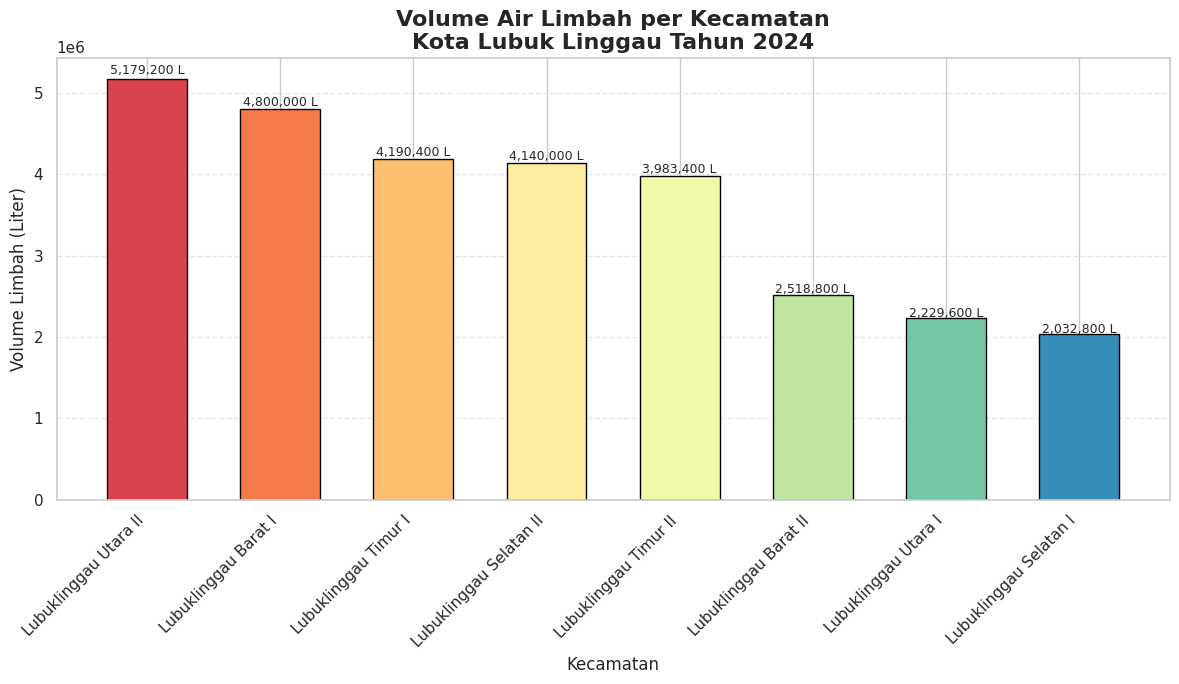

In [113]:
# Volume Limbah Air
# Hapus baris total agar tidak divisualisasikan
limbah_plot = limbah_table[limbah_table['Kecamatan'] != 'Total'].copy()

# Sort nilai dari tinggi ke rendah
limbah_plot = limbah_plot.sort_values('Volume Limbah (Liter)', ascending=False).reset_index(drop=True)

# Buat warna gradasi dari palette
colors = sns.color_palette("Spectral", len(limbah_plot))

# Buat plot
plt.figure(figsize=(12, 7))
bars = plt.bar(
    limbah_plot['Kecamatan'],
    limbah_plot['Volume Limbah (Liter)'],
    color=colors,
    edgecolor='black',
    width=0.6
)

# Tambahkan label nilai di atas bar
for i, value in enumerate(limbah_plot['Volume Limbah (Liter)']):
    plt.text(i, value + value * 0.01, f"{value:,.0f} L", ha='center', fontsize=9)

# Gaya visualisasi
plt.title("Volume Air Limbah per Kecamatan\nKota Lubuk Linggau Tahun 2024", fontsize=16, weight='bold')
plt.xlabel("Kecamatan", fontsize=12)
plt.ylabel("Volume Limbah (Liter)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

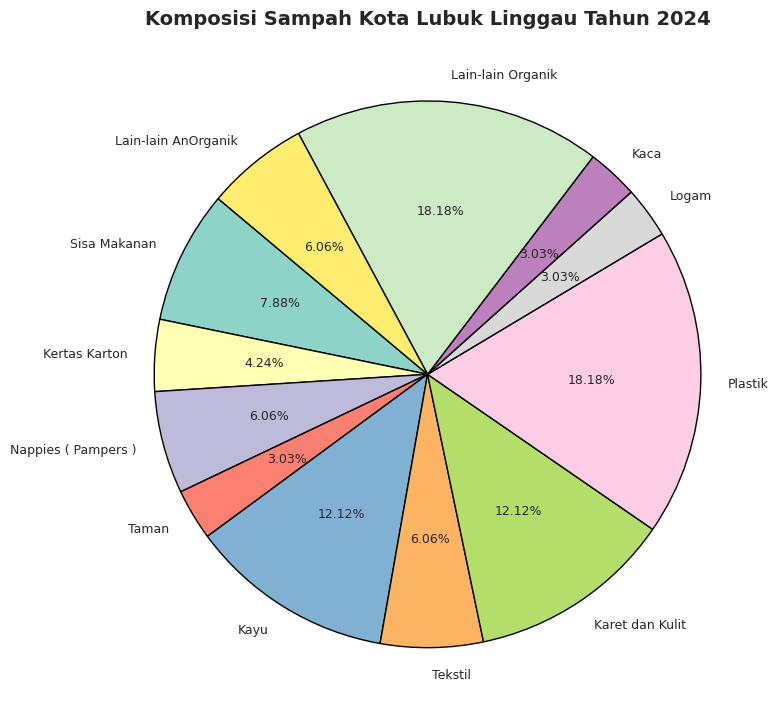

In [114]:
# Komposisi Sampah
# Filter baris komposisi sampah
komposisi_mask = dlh_df['NAMA'].str.contains("Komposisi Sampah", case=False)
komposisi_data = dlh_df[komposisi_mask][['NAMA', 'NILAI 2024 SEMESTER I']].copy()

# Ambil jenis sampah dan nilai persentase
komposisi_data['Jenis Sampah'] = komposisi_data['NAMA'].str.replace("Komposisi Sampah ", "", regex=False)
komposisi_data['Persentase'] = pd.to_numeric(komposisi_data['NILAI 2024 SEMESTER I'], errors='coerce')

# Warna cerah kreatif
colors = sns.color_palette("Set3", len(komposisi_data))

# Plot pie chart
plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(
    komposisi_data['Persentase'],
    labels=komposisi_data['Jenis Sampah'],
    autopct='%.2f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'black'}
)

# Format teks
for text in texts:
    text.set_fontsize(9)
for autotext in autotexts:
    autotext.set_fontsize(9)

plt.title("Komposisi Sampah Kota Lubuk Linggau Tahun 2024", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

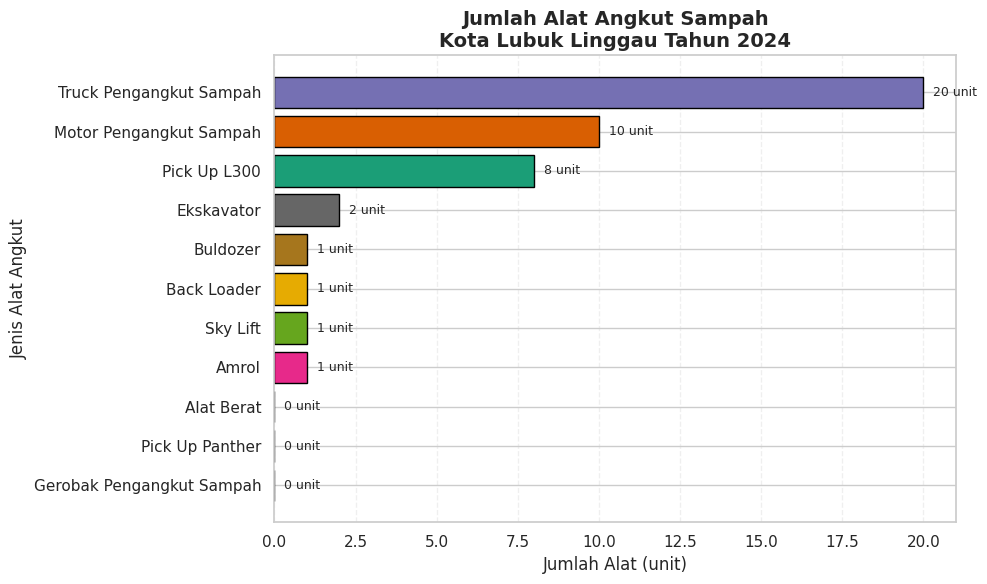

In [115]:
# Alat Pengangkut Sampah
# Hapus baris total untuk visualisasi
alat_plot = alat_table[alat_table['Jenis Alat Angkut'] != 'Total'].copy()
alat_plot = alat_plot.sort_values('Jumlah', ascending=True).reset_index(drop=True)

# Warna kreatif
colors = sns.color_palette("Dark2", len(alat_plot))

# Plot horizontal bar
plt.figure(figsize=(10, 6))
bars = plt.barh(alat_plot['Jenis Alat Angkut'], alat_plot['Jumlah'], color=colors, edgecolor='black')

# Tambahkan label angka
for i, value in enumerate(alat_plot['Jumlah']):
    plt.text(value + 0.3, i, f"{int(value)} unit", va='center', fontsize=9)

plt.title("Jumlah Alat Angkut Sampah\nKota Lubuk Linggau Tahun 2024", fontsize=14, weight='bold')
plt.xlabel("Jumlah Alat (unit)")
plt.ylabel("Jenis Alat Angkut")
plt.grid(axis='x', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()